## Classifier using pre-trained models to detect cracks in images of concrete

#### Import Libraries and Packages

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

from PIL import Image

#### Loading the dataset

##### Loading all the negative Images (The one's with no cracks present)

In [42]:
negative_images = os.listdir('./concrete_data/train/Negative')
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

In [43]:
negative_images.sort()
negative_images

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg',
 '00016.jpg',
 '00017.jpg',
 '00018.jpg',
 '00019.jpg',
 '00020.jpg',
 '00021.jpg',
 '00022.jpg',
 '00023.jpg',
 '00024.jpg',
 '00025.jpg',
 '00026.jpg',
 '00027.jpg',
 '00028.jpg',
 '00029.jpg',
 '00030.jpg',
 '00031.jpg',
 '00032.jpg',
 '00033.jpg',
 '00034.jpg',
 '00035.jpg',
 '00036.jpg',
 '00037.jpg',
 '00038.jpg',
 '00039.jpg',
 '00040.jpg',
 '00041.jpg',
 '00042.jpg',
 '00043.jpg',
 '00044.jpg',
 '00045.jpg',
 '00046.jpg',
 '00047.jpg',
 '00048.jpg',
 '00049.jpg',
 '00050.jpg',
 '00051.jpg',
 '00052.jpg',
 '00053.jpg',
 '00054.jpg',
 '00055.jpg',
 '00056.jpg',
 '00057.jpg',
 '00058.jpg',
 '00059.jpg',
 '00060.jpg',
 '00061.jpg',
 '00062.jpg',
 '00063.jpg',
 '00064.jpg',
 '00065.jpg',
 '00066.jpg',
 '00067.jpg',
 '00068.jpg',
 '00069.jpg',
 '00070.jpg',
 '00071.jpg',
 '0007

Displaying a sample image using PIL

In [44]:
image_data = Image.open('./concrete_data/train/Negative/{}'.format(negative_images[0]))

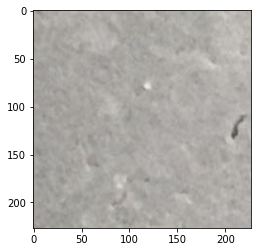

In [45]:
plt.imshow(image_data)

In [46]:
image_data.size

(227, 227)

Let's loop through all the images in the ./Negative directory and add save their paths.

In [47]:
negative_images_dir = ['./.concrete_data/train/Negative/{}'.format(image) for image in negative_images]
negative_images_dir

['./.concrete_data/train/Negative/00001.jpg',
 './.concrete_data/train/Negative/00002.jpg',
 './.concrete_data/train/Negative/00003.jpg',
 './.concrete_data/train/Negative/00004.jpg',
 './.concrete_data/train/Negative/00005.jpg',
 './.concrete_data/train/Negative/00006.jpg',
 './.concrete_data/train/Negative/00007.jpg',
 './.concrete_data/train/Negative/00008.jpg',
 './.concrete_data/train/Negative/00009.jpg',
 './.concrete_data/train/Negative/00010.jpg',
 './.concrete_data/train/Negative/00011.jpg',
 './.concrete_data/train/Negative/00012.jpg',
 './.concrete_data/train/Negative/00013.jpg',
 './.concrete_data/train/Negative/00014.jpg',
 './.concrete_data/train/Negative/00015.jpg',
 './.concrete_data/train/Negative/00016.jpg',
 './.concrete_data/train/Negative/00017.jpg',
 './.concrete_data/train/Negative/00018.jpg',
 './.concrete_data/train/Negative/00019.jpg',
 './.concrete_data/train/Negative/00020.jpg',
 './.concrete_data/train/Negative/00021.jpg',
 './.concrete_data/train/Negative/

Total number of images with no crack in the dataset

In [48]:
len(negative_images_dir)

20000

##### Loading all the positive Images (The one's with cracks present)

In [49]:
positive_images = os.listdir('./concrete_data/train/Positive')
positive_images.sort()

Now let's loop through all the images in the ./Negative directory and add save their paths.

In [50]:
positive_images_dir = ['./concrete_data/train/Positive/{}'.format(image) for image in positive_images]
positive_images_dir

['./concrete_data/train/Positive/00001.jpg',
 './concrete_data/train/Positive/00002.jpg',
 './concrete_data/train/Positive/00003.jpg',
 './concrete_data/train/Positive/00004.jpg',
 './concrete_data/train/Positive/00005.jpg',
 './concrete_data/train/Positive/00006.jpg',
 './concrete_data/train/Positive/00007.jpg',
 './concrete_data/train/Positive/00008.jpg',
 './concrete_data/train/Positive/00009.jpg',
 './concrete_data/train/Positive/00010.jpg',
 './concrete_data/train/Positive/00011.jpg',
 './concrete_data/train/Positive/00012.jpg',
 './concrete_data/train/Positive/00013.jpg',
 './concrete_data/train/Positive/00014.jpg',
 './concrete_data/train/Positive/00015.jpg',
 './concrete_data/train/Positive/00016.jpg',
 './concrete_data/train/Positive/00017.jpg',
 './concrete_data/train/Positive/00018.jpg',
 './concrete_data/train/Positive/00019.jpg',
 './concrete_data/train/Positive/00020.jpg',
 './concrete_data/train/Positive/00021.jpg',
 './concrete_data/train/Positive/00022.jpg',
 './concre

### Data Preparation

In [51]:
dataset_dir = './concrete_data/train'

#### Construct an ImageDataGenerator Instance

In [52]:
# instantiate your image data generator
data_generator = ImageDataGenerator()

Next, we use the flow_from_directory methods to loop through the images in batches

In [53]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


Now, to access the batches, we can you use the <code>next</code> method:

In [54]:
first_batch = image_generator.next()
first_batch

(array([[[[151., 149., 150.],
          [153., 151., 152.],
          [155., 153., 154.],
          ...,
          [153., 149., 148.],
          [153., 149., 148.],
          [153., 149., 148.]],
 
         [[152., 150., 151.],
          [154., 152., 153.],
          [156., 154., 155.],
          ...,
          [154., 150., 149.],
          [154., 150., 149.],
          [154., 150., 149.]],
 
         [[153., 151., 152.],
          [155., 153., 154.],
          [156., 154., 155.],
          ...,
          [156., 152., 151.],
          [156., 152., 151.],
          [156., 152., 151.]],
 
         ...,
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [139., 135., 136.],
          [142., 138., 139.],
          [145., 141., 142.]],
 
         [[142., 140., 143.],
          [142., 140., 143.],
          [142., 140., 143.],
          ...,
          [140., 136., 137.],
          [142., 138., 139.],
          [146., 142., 143.

In [55]:
first_batch_images = image_generator.next()[0]
first_batch_images

array([[[[172., 174., 169.],
         [176., 178., 173.],
         [181., 183., 178.],
         ...,
         [157., 159., 154.],
         [156., 158., 153.],
         [154., 156., 151.]],

        [[170., 172., 167.],
         [172., 174., 169.],
         [174., 176., 171.],
         ...,
         [155., 157., 152.],
         [154., 156., 151.],
         [153., 155., 150.]],

        [[169., 171., 166.],
         [167., 169., 164.],
         [166., 168., 163.],
         ...,
         [152., 154., 149.],
         [152., 154., 149.],
         [151., 153., 148.]],

        ...,

        [[153., 154., 148.],
         [155., 156., 150.],
         [158., 159., 153.],
         ...,
         [143., 144., 138.],
         [144., 145., 139.],
         [145., 146., 140.]],

        [[147., 148., 142.],
         [150., 151., 145.],
         [153., 154., 148.],
         ...,
         [142., 143., 137.],
         [143., 144., 138.],
         [144., 145., 139.]],

        [[141., 142., 136.],
       

In [56]:
first_batch_labels = image_generator.next()[1]
first_batch_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Now, creating a Custom ImageDataGenerator

In [57]:
# instantiate your image data generator
data_generator = ImageDataGenerator(
    rescale=1./255
)

In [58]:
image_generator = data_generator.flow_from_directory(
    dataset_dir,
    batch_size=4,
    class_mode='categorical',
    seed=24
)

Found 40000 images belonging to 2 classes.


Now we can explore the first batch using the <code>next</code> method 

In [59]:
first_batch = image_generator.next()
first_batch

(array([[[[0.5921569 , 0.58431375, 0.5882353 ],
          [0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          ...,
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ],
          [0.6       , 0.58431375, 0.5803922 ]],
 
         [[0.59607846, 0.5882353 , 0.5921569 ],
          [0.6039216 , 0.59607846, 0.6       ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375],
          [0.6039216 , 0.5882353 , 0.58431375]],
 
         [[0.6       , 0.5921569 , 0.59607846],
          [0.60784316, 0.6       , 0.6039216 ],
          [0.6117647 , 0.6039216 , 0.60784316],
          ...,
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ],
          [0.6117647 , 0.59607846, 0.5921569 ]],
 
         ...,
 
         [[0.5568628 , 0.54901963, 0.56078434],
          [0.55686

we find that the values are not integer values anymore, but scaled resolution since the original number are divided by 255.

### Visualize Batches of Images

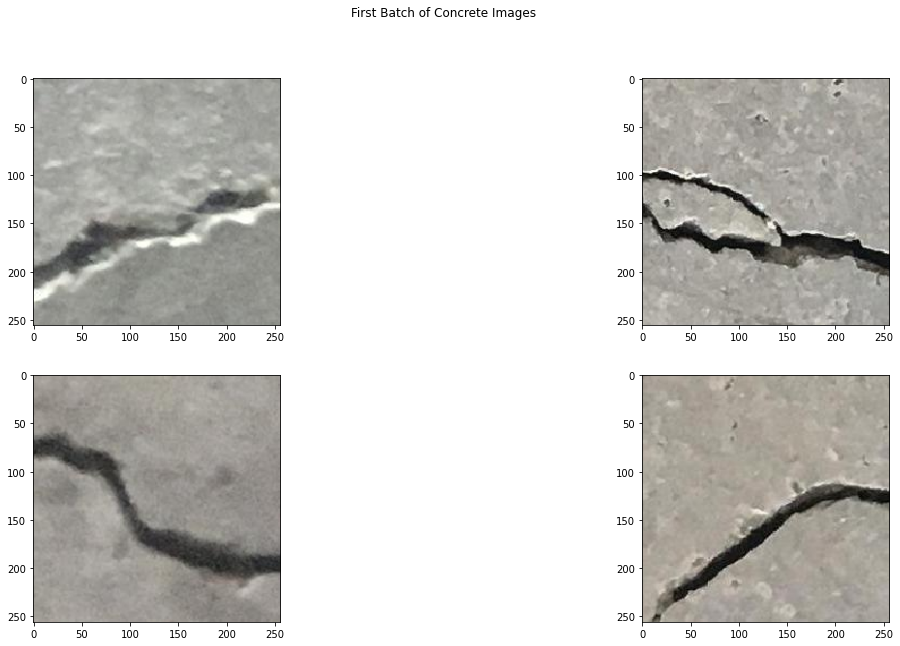

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) # define your figure and axes

ind = 0
for ax1 in axs:
    for ax2 in ax1: 
        image_data = first_batch_images[ind].astype(np.uint8)
        ax2.imshow(image_data)
        ind += 1

fig.suptitle('First Batch of Concrete Images') 
plt.show()

### Leveraging ResNet50 to train a classifier model

In [61]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

### Preprocessing the training and validation dataset

we will set the preprocessing_function argument to preprocess_input which we imported from keras.applications.resnet50 in order to preprocess our images the same way the images used to train ResNet50 model were processed

In [62]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [63]:
train_generator = data_generator.flow_from_directory(
    'concrete_data/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 40000 images belonging to 2 classes.


In [64]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data/validation',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 7243 images belonging to 2 classes.


### Building, Compiling and Fitting the Model

In [65]:
model = Sequential()

Next, we will add the ResNet50 pre-trained model to this model. Here, we don't want to include the top layer or the output layer of the pre-trained model. We actually want to define our own output layer and train it so that it is optimized for our image dataset. In order to leave out the output layer of the pre-trained model, we will use the argument *include_top* and set it to **False**.

In [66]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

Then, we will define our output layer as a **Dense** layer, that consists of two nodes and uses the **Softmax** function as the activation function.


In [67]:
model.add(Dense(num_classes, activation='softmax'))

You can access the model's layers using the layers attribute of our model object.

In [68]:
model.layers

As you can see the model is composed of two sets of layers. The first set is the layers pertaining to ResNet50 and the second set is a single layer, which is our Dense layer that we defined above. Since the ResNet50 model has already been trained, then we want to tell our model not to bother with training the ResNet part, but to train only our dense output layer. To do that, we run the following.

In [69]:
model.layers[0].trainable = False

And now using the summary attribute of the model, we can see how many parameters we will need to optimize in order to train the output layer.

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Next we compile our model using the adam optimizer.

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Before we are able to start the training process, with an ImageDataGenerator, we will need to define how many steps compose an epoch. Typically, that is the number of images divided by the batch size. Therefore, we define our steps per epoch as follows:

In [72]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [73]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

C:\Users\user\AppData\Local\Temp/ipykernel_21680/251737888.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/2


400/400 [==============================] - 4349s 11s/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0056 - val_accuracy: 0.9992
Epoch 2/2
400/400 [==============================] - 2468s 6s/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9994


Now that the model is trained, we are ready to start using it to classify images.

Since training can take a long time when building deep learning models, it is always a good idea to save your model once the training is complete

In [74]:
model.save('classifier_resnet_model.h5')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
